##### O CÓDIGO ABAIXO SIMULA O RESULTADO DO ARTIGO "O CAMINHANTE ALEATÓRIO QUE LEVA MOEDAS"

##### PRIMEIRO CÓDIGO - SIMULAR A RENDA DO REI

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['figure.figsize'] = [6, 4]
mpl.rc('font', size=16)

for k in range(10):
    Q = [1,1,1,1,1,1,1,1,1]
    
    numeros = []
    for i in range(9):
        numero = random.randint(0, 8)
        numeros.append(numero)
    for i in range(9):
        Q[i] = Q[i]-1
        Q[numeros[i]] = Q[numeros[i]] + 1

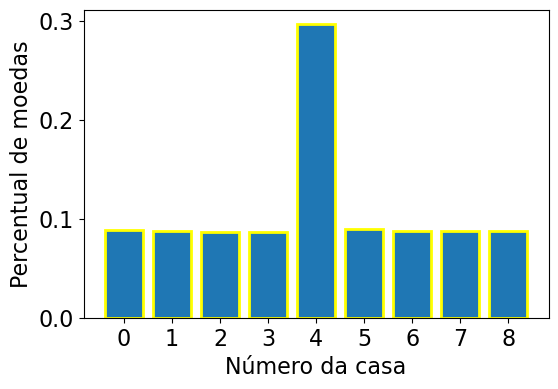

[0.08885556 0.08814444 0.08672222 0.0865     0.29672222 0.08966667
 0.08801111 0.08811111 0.08726667]


In [2]:
num_casas = 9
num_rodadas = 10000

# Criando uma lista para armazenar a soma dos valores de cada casa nas 10 rodadas
soma_valores_casas = [0]*num_casas

for n in range(num_rodadas):
    # Criando uma lista para armazenar as moedas em cada casa
    Q = [1]*num_casas

    # Iterando pelas casas
    for i in range(num_casas):
        # Escolhendo aleatoriamente o receptor da moeda
        receptor = random.choice([i-1, i+1, 4])
        # Verificando as condições de contorno
        if receptor == -1:
            receptor = num_casas-1
        elif receptor == num_casas:
            receptor = 0
        
        # Transferindo a moeda
        Q[i] -= 1
        Q[receptor] += 1
    
    # Escolhendo aleatoriamente para qual casa o rei dará a moeda
    receptor = random.choice([i for i in range(num_casas) if i != 4])
    Q[4] -= 1
    Q[receptor] += 1

    # Imprimindo o número de moedas em cada casa na rodada atual
    #print(f"Rodada {n+1}: {Q}")

    # Atualizando a lista da soma dos valores das casas
    soma_valores_casas = [x+y for x,y in zip(soma_valores_casas, Q)]

# Plotando o gráfico de barras da soma dos valores das casas
plt.bar(np.linspace(0, num_casas-1, num_casas), soma_valores_casas/np.sum(soma_valores_casas))
plt.xticks(np.arange(num_casas), np.arange(num_casas))
plt.ylabel("Percentual de moedas")
plt.xlabel("Número da casa")
plt.show()

##### SEGUNDO CÓDIGO - GERAR A GAUSSIANA

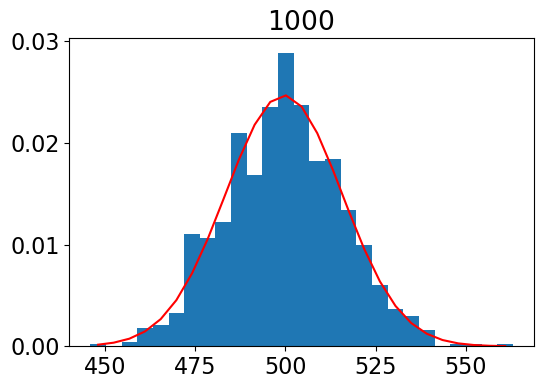

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [6, 4]

soma = []
iteracoes = 1000

for i in range(iteracoes):
    seq = [random.randint(0, 1) for i in range(1000)]
    soma.append(sum(seq))

# Plota histograma da lista "soma"
hist, bins = np.histogram(soma, bins='auto', density=True)
width = bins[1] - bins[0]
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, label='Histograma')

# Ajuste da distribuição gaussiana
mu, std = norm.fit(soma)
pdf_g = norm.pdf(center, mu, std)
plt.plot(center, pdf_g, color='r')

#grafico
plt.title(f'{iteracoes}')
plt.show()